In [1]:
from langchain_groq import ChatGroq
from langgraph.graph import StateGraph , END , START
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.prebuilt import ToolNode 
import arxiv
from dotenv import load_dotenv
from langchain.tools import tool
load_dotenv()
from langchain_community.tools import TavilySearchResults


In [34]:
from langchain.tools import tool
import arxiv

@tool
def Arivsearch(query: str, max_result: int = 5) -> str:
    """
    Arxiv search agent to retrieve research papers related to the user's query.
    Returns a string with paper titles, authors, date, and PDF URL.

    """
    client = arxiv.Client()
    search = arxiv.Search(query=query, max_results=max_result, sort_by=arxiv.SortCriterion.Relevance)
    results = []

    for paper in client.results(search):
        info = (
            f"📄 **Title**: {paper.title}\n"
            f"👨‍🔬 **Authors**: {', '.join([a.name for a in paper.authors])}\n"
            f"📅 **Published**: {paper.published.date()}\n"
            f"🔗 **PDF**: {paper.pdf_url}\n"
            "----------------------------------------\n"
        )
        results.append(info)

    return "\n".join(results) if results else "No papers found for your query."


In [35]:
#model initialization
llm=ChatGroq(
    model="llama-3.1-8b-instant", 
)

In [36]:
tool=[Arivsearch]
LLm_with_tools=llm.bind_tools(tool)

In [37]:
#creat the Graph
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition 
class State(TypedDict):
    messages: Annotated[list, add_messages]

def chatbot_with_tools(state: State):
    return {"messages": [LLm_with_tools.invoke(state["messages"])]}
# Create the state graph with tools
Bulider=StateGraph(State)
Bulider.add_node("chatbot_with_tools", chatbot_with_tools)
Bulider.add_node("tools", ToolNode(tool))
# Add conditional edges 
Bulider.add_conditional_edges(
    "chatbot_with_tools",tools_condition)
#edage
Bulider.add_edge(START, "chatbot_with_tools")
# Bulider.add_edge("chatbot_with_tools", "tools")
Bulider.add_edge("tools", "chatbot_with_tools")
# Bulider.add_edge("chatbot_with_tools",END)
app = Bulider.compile()



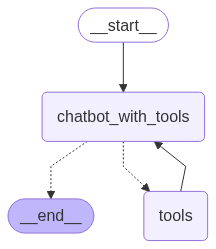

In [38]:
app

In [39]:
response=" "
for event in app.stream({"messages":"large lanuage model and top 5" }):
    for value in event.values():
        print(value)

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'k03tewe5s', 'function': {'arguments': '{"max_result":5,"query":"large language model"}', 'name': 'Arivsearch'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 281, 'total_tokens': 305, 'completion_time': 0.03402992, 'prompt_time': 0.020163458, 'queue_time': 0.04961412700000001, 'total_time': 0.054193378}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_0f5c9bc037', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--48f10fee-580a-4b14-bcc2-ef0e24589b90-0', tool_calls=[{'name': 'Arivsearch', 'args': {'max_result': 5, 'query': 'large language model'}, 'id': 'k03tewe5s', 'type': 'tool_call'}], usage_metadata={'input_tokens': 281, 'output_tokens': 24, 'total_tokens': 305})]}
{'messages': [ToolMessage(content='📄 **Title**: Lost in Translation: Large Language Models in Non-English Content Analysis\n👨\u200d🔬 **Authors**: Gabriel Nicholas, Al

In [33]:
response

' '

In [26]:
for m in result['messages']:
    m.pretty_print() 

NameError: name 'result' is not defined

In [29]:
for event in app.stream({"messages":"large lanuage model and 2 top" },stream_mode="values"):
    for value in event.values():
        print(value)

[HumanMessage(content='large lanuage model and 2 top', additional_kwargs={}, response_metadata={}, id='c5660f36-8d72-42ac-8aa9-0b66934ecb19')]
[HumanMessage(content='large lanuage model and 2 top', additional_kwargs={}, response_metadata={}, id='c5660f36-8d72-42ac-8aa9-0b66934ecb19'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'xc58zxt6w', 'function': {'arguments': '{"max_result":5,"query":"large language model top 2"}', 'name': 'Arivsearch'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 281, 'total_tokens': 308, 'completion_time': 0.040324931, 'prompt_time': 0.016731039, 'queue_time': 0.04860787, 'total_time': 0.05705597}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_0f5c9bc037', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--9bf93023-489c-442a-9cc7-798d0a36ab96-0', tool_calls=[{'name': 'Arivsearch', 'args': {'max_result': 5, 'query': 'large language model top 2'}, 'id': 'xc58zxt6

C:\Users\vicky\AppData\Local\Temp\ipykernel_7676\4216204190.py:13: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for paper in search.results():


[HumanMessage(content='large lanuage model and 2 top', additional_kwargs={}, response_metadata={}, id='c5660f36-8d72-42ac-8aa9-0b66934ecb19'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'xc58zxt6w', 'function': {'arguments': '{"max_result":5,"query":"large language model top 2"}', 'name': 'Arivsearch'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 281, 'total_tokens': 308, 'completion_time': 0.040324931, 'prompt_time': 0.016731039, 'queue_time': 0.04860787, 'total_time': 0.05705597}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_0f5c9bc037', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--9bf93023-489c-442a-9cc7-798d0a36ab96-0', tool_calls=[{'name': 'Arivsearch', 'args': {'max_result': 5, 'query': 'large language model top 2'}, 'id': 'xc58zxt6w', 'type': 'tool_call'}], usage_metadata={'input_tokens': 281, 'output_tokens': 27, 'total_tokens': 308}), ToolMessage(content='📄 **Title**: L

C:\Users\vicky\AppData\Local\Temp\ipykernel_7676\4216204190.py:13: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for paper in search.results():


[HumanMessage(content='large lanuage model and 2 top', additional_kwargs={}, response_metadata={}, id='c5660f36-8d72-42ac-8aa9-0b66934ecb19'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'xc58zxt6w', 'function': {'arguments': '{"max_result":5,"query":"large language model top 2"}', 'name': 'Arivsearch'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 281, 'total_tokens': 308, 'completion_time': 0.040324931, 'prompt_time': 0.016731039, 'queue_time': 0.04860787, 'total_time': 0.05705597}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_0f5c9bc037', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--9bf93023-489c-442a-9cc7-798d0a36ab96-0', tool_calls=[{'name': 'Arivsearch', 'args': {'max_result': 5, 'query': 'large language model top 2'}, 'id': 'xc58zxt6w', 'type': 'tool_call'}], usage_metadata={'input_tokens': 281, 'output_tokens': 27, 'total_tokens': 308}), ToolMessage(content='📄 **Title**: L

C:\Users\vicky\AppData\Local\Temp\ipykernel_7676\4216204190.py:13: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for paper in search.results():


[HumanMessage(content='large lanuage model and 2 top', additional_kwargs={}, response_metadata={}, id='c5660f36-8d72-42ac-8aa9-0b66934ecb19'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'xc58zxt6w', 'function': {'arguments': '{"max_result":5,"query":"large language model top 2"}', 'name': 'Arivsearch'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 281, 'total_tokens': 308, 'completion_time': 0.040324931, 'prompt_time': 0.016731039, 'queue_time': 0.04860787, 'total_time': 0.05705597}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_0f5c9bc037', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--9bf93023-489c-442a-9cc7-798d0a36ab96-0', tool_calls=[{'name': 'Arivsearch', 'args': {'max_result': 5, 'query': 'large language model top 2'}, 'id': 'xc58zxt6w', 'type': 'tool_call'}], usage_metadata={'input_tokens': 281, 'output_tokens': 27, 'total_tokens': 308}), ToolMessage(content='📄 **Title**: L

C:\Users\vicky\AppData\Local\Temp\ipykernel_7676\4216204190.py:13: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for paper in search.results():


[HumanMessage(content='large lanuage model and 2 top', additional_kwargs={}, response_metadata={}, id='c5660f36-8d72-42ac-8aa9-0b66934ecb19'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'xc58zxt6w', 'function': {'arguments': '{"max_result":5,"query":"large language model top 2"}', 'name': 'Arivsearch'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 281, 'total_tokens': 308, 'completion_time': 0.040324931, 'prompt_time': 0.016731039, 'queue_time': 0.04860787, 'total_time': 0.05705597}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_0f5c9bc037', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--9bf93023-489c-442a-9cc7-798d0a36ab96-0', tool_calls=[{'name': 'Arivsearch', 'args': {'max_result': 5, 'query': 'large language model top 2'}, 'id': 'xc58zxt6w', 'type': 'tool_call'}], usage_metadata={'input_tokens': 281, 'output_tokens': 27, 'total_tokens': 308}), ToolMessage(content='📄 **Title**: L

C:\Users\vicky\AppData\Local\Temp\ipykernel_7676\4216204190.py:13: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for paper in search.results():


[HumanMessage(content='large lanuage model and 2 top', additional_kwargs={}, response_metadata={}, id='c5660f36-8d72-42ac-8aa9-0b66934ecb19'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'xc58zxt6w', 'function': {'arguments': '{"max_result":5,"query":"large language model top 2"}', 'name': 'Arivsearch'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 281, 'total_tokens': 308, 'completion_time': 0.040324931, 'prompt_time': 0.016731039, 'queue_time': 0.04860787, 'total_time': 0.05705597}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_0f5c9bc037', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--9bf93023-489c-442a-9cc7-798d0a36ab96-0', tool_calls=[{'name': 'Arivsearch', 'args': {'max_result': 5, 'query': 'large language model top 2'}, 'id': 'xc58zxt6w', 'type': 'tool_call'}], usage_metadata={'input_tokens': 281, 'output_tokens': 27, 'total_tokens': 308}), ToolMessage(content='📄 **Title**: L

C:\Users\vicky\AppData\Local\Temp\ipykernel_7676\4216204190.py:13: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for paper in search.results():


[HumanMessage(content='large lanuage model and 2 top', additional_kwargs={}, response_metadata={}, id='c5660f36-8d72-42ac-8aa9-0b66934ecb19'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'xc58zxt6w', 'function': {'arguments': '{"max_result":5,"query":"large language model top 2"}', 'name': 'Arivsearch'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 281, 'total_tokens': 308, 'completion_time': 0.040324931, 'prompt_time': 0.016731039, 'queue_time': 0.04860787, 'total_time': 0.05705597}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_0f5c9bc037', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--9bf93023-489c-442a-9cc7-798d0a36ab96-0', tool_calls=[{'name': 'Arivsearch', 'args': {'max_result': 5, 'query': 'large language model top 2'}, 'id': 'xc58zxt6w', 'type': 'tool_call'}], usage_metadata={'input_tokens': 281, 'output_tokens': 27, 'total_tokens': 308}), ToolMessage(content='📄 **Title**: L

KeyboardInterrupt: 

In [30]:
import arxiv

search = arxiv.Search(query="bag of words", max_results=5)
for paper in search.results():
    print(paper.title)


C:\Users\vicky\AppData\Local\Temp\ipykernel_7676\1833175453.py:4: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for paper in search.results():


Word Vector Enrichment of Low Frequency Words in the Bag-of-Words Model for Short Text Multi-class Classification Problems
Query-bag Matching with Mutual Coverage for Information-seeking Conversations in E-commerce
Generalizing Word Embeddings using Bag of Subwords
Morphological Skip-Gram: Using morphological knowledge to improve word representation
Distributed Representations of Sentences and Documents


In [51]:
from langchain_core.messages import HumanMessage
graph_app.invoke({"messages": [HumanMessage(content="LLM with agentic")]})


NameError: name 'last_msg' is not defined

In [ ]:
# # Imports
# from dotenv import load_dotenv
# import streamlit as st
# import arxiv
# from typing import Annotated
# from typing_extensions import TypedDict

# from langchain.tools import tool
# from langchain_community.tools import TavilySearchResults
# from langchain_groq import ChatGroq
# from langchain_core.messages import HumanMessage
# from langgraph.graph import StateGraph, START, END
# from langgraph.graph.message import add_messages
# from langgraph.prebuilt import ToolNode, tools_condition

# # Load env vars
# load_dotenv()


# @tool
# def Arivsearch(query: str, max_result: int = 5) -> str:
#     """Arxiv search agent to retrieve research papers related to the user's query."""
#     search = arxiv.Search(query=query, max_results=max_result, sort_by=arxiv.SortCriterion.Relevance)
#     results = []

#     for paper in search.results():
#         info = (
#             f"📄 **Title**: {paper.title}\n"
#             f"👨‍🔬 **Authors**: {', '.join([a.name for a in paper.authors])}\n"
#             f"📅 **Published**: {paper.published.date()}\n"
#             f"🔗 **PDF**: {paper.pdf_url}\n"
#             "----------------------------------------\n"
#         )
#         results.append(info)

#     return "\n".join(results) if results else "No papers found for your query."



# # @tool
# # def Arivsearch(query: str, max_result: int = 5) -> str:
# #     """Arxiv search agent to retrieve research papers related to the user's query."""
# #     client = arxiv.Client()
# #     search = arxiv.Search(query=query, max_results=max_result, sort_by=arxiv.SortCriterion.Relevance)
    
# #     results = []

# #     for paper in client.results(search):
# #         info = (
# #             f"📄 **Title**: {paper.title}\n"
# #             f"👨‍🔬 **Authors**: {', '.join([a.name for a in paper.authors])}\n"
# #             f"📅 **Published**: {paper.published.date()}\n"
# #             f"🔗 **PDF**: {paper.pdf_url}\n"
# #             "----------------------------------------\n"
# #         )
# #         results.append(info)

# #     return "\n".join(results) if results else "No papers found for your query."

# # 🔮 LLM Initialization
# llm = ChatGroq(model="llama-3.1-8b-instant")
# tool_list = [Arivsearch]
# LLM_with_tools = llm.bind_tools(tool_list)

# # 📦 LangGraph State
# class State(TypedDict):
#     messages: Annotated[list, add_messages]

# def chatbot_with_tools(state: State):
#     result = LLM_with_tools.invoke(state["messages"])
#     return {"messages": [result]}

# # 🧠 Build LangGraph
# builder = StateGraph(State)
# builder.add_node("chatbot_with_tools", chatbot_with_tools)
# builder.add_node("tools", ToolNode(tool_list))

# builder.add_conditional_edges("chatbot_with_tools", tools_condition)
# builder.add_edge(START, "chatbot_with_tools")
# builder.add_edge("tools", END)

# app = builder.compile()

# # 🌐 Streamlit UI

# for event in app.stream({"messages":"large lanuage model" }):
#     for value in event.values():
#         print(value)





from dotenv import load_dotenv
import streamlit as st
import arxiv
from typing import Annotated, List, Dict, Any
from typing_extensions import TypedDict
import uuid

from langchain.tools import tool
from langchain_core.messages import HumanMessage, AIMessage, BaseMessage
from langchain_groq import ChatGroq
from langgraph.graph import StateGraph, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

# Load env vars
load_dotenv()

# 📚 Fixed ArXiv Search Tool
@tool
def Arivsearch(query: str, max_results: int = 5) -> str:
    """Search arXiv for research papers related to the query."""
    client = arxiv.Client()
    search = arxiv.Search(
        query=query, 
        max_results=max_results,
        sort_by=arxiv.SortCriterion.Relevance
    )
    
    results = []
    try:
        for paper in client.results(search):
            authors = ", ".join(a.name for a in paper.authors)
            result = (
                f"**Title**: {paper.title}\n"
                f"**Authors**: {authors}\n"
                f"**Published**: {paper.published.strftime('%Y-%m-%d')}\n"
                f"**Summary**: {paper.summary[:150]}...\n"
                f"**PDF URL**: {paper.pdf_url}\n"
                "---"
            )
            results.append(result)
        return "\n\n".join(results) if results else "No papers found."
    except Exception as e:
        return f"Search failed: {str(e)}"

# 🔮 LLM Initialization with error handling
try:
    llm = ChatGroq(model="llama3-70b-8192", temperature=0.3)
    tool_list = [Arivsearch]
    llm_with_tools = llm.bind_tools(tool_list)
except Exception as e:
    st.error(f"Failed to initialize LLM: {str(e)}")
    st.stop()

# 📦 LangGraph State with Pydantic v2 compatibility
class AgentState(TypedDict):
    messages: Annotated[List[BaseMessage], add_messages]

def agent_node(state: AgentState) -> Dict[str, Any]:
    """Node that calls the LLM with tools."""
    response = llm_with_tools.invoke(state["messages"])
    return {"messages": [response]}

        

# 🧠 Build LangGraph Workflow
try:
    builder = StateGraph(AgentState)   
    builder.add_node("agent", agent_node)
    builder.add_node("tools", ToolNode(tool_list))

    builder.set_entry_point("agent")
    builder.add_conditional_edges(
        "agent",
        tools_condition
    )
    builder.add_edge("tools", "agent")
    graph = builder.compile()
except Exception as e:
    st.error(f"Failed to build agent graph: {str(e)}")
    st.stop()

# 🌐 Streamlit UI
st.set_page_config(page_title="ArXiv Research Agent", page_icon="📚")
st.title("🔍 ArXiv Research Assistant")

# Initialize session state
if "messages" not in st.session_state:
    st.session_state.messages = [AIMessage(content="Hello! I can search arXiv research papers. What topic are you interested in?")]

# Display chat history
for msg in st.session_state.messages:
    if isinstance(msg, HumanMessage):
        with st.chat_message("user"):
            st.write(msg.content)
    else:
        with st.chat_message("assistant"):
            st.markdown(msg.content)

# Handle user input

prompt="large language models with agentic"
if prompt:
    # Add user message to state
    st.session_state.messages.append(HumanMessage(content=prompt))
    
    # Display user message
    with st.chat_message("user"):
        st.write(prompt)
    
    # Generate response
    with st.chat_message("assistant"):
        message_placeholder = st.empty()
        full_response = ""
        
       
            # Stream the agent response
for event in graph.stream({"messages": st.session_state.messages}):
    for value in event.values():
        
                        


2025-07-05 22:42:45.268 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 22:42:45.271 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 22:42:45.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 22:42:45.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 22:42:45.281 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 22:42:45.284 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 22:42:45.287 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 22:42:45.287 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

KeyError: -1

In [3]:
from dotenv import load_dotenv
from langgraph.graph import StateGraph ,START,END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode ,tools_condition
from langchain_core.messages import HumanMessage
from langchain_groq import ChatGroq
from typing_extensions import TypedDict
from typing import Annotated
from langchain_tavily import TavilySearch
load_dotenv()


LLM=ChatGroq(
    model="llama3-70b-8192",
    temperature=1
)


search=TavilySearch(max_results=2)

tools=[search]

llm=LLM.bind_tools(tools)


class State(TypedDict):
    messages:Annotated[list,add_messages]


def chattools(state:State):
    return{
        "messages":[llm.invoke(state["messages"])]
    }


graph_builder=StateGraph(State)

graph_builder.add_node("chat_with_tools",chattools)
graph_builder.add_node("tools",ToolNode(tools))
graph_builder.add_edge(START,"chat_with_tools")
graph_builder.add_conditional_edges("chat_with_tools",tools_condition)
graph_builder.add_edge("tools","chat_with_tools") 


app=graph_builder.compile()




while True:
    query=input("here are : ")
    if query=="exist":
        break
    response=app.invoke({
        "messages":HumanMessage(content=query)
    })

    print(response["messages"][-1]) 

content='I apologize for the inconvenience. It seems like the Tavily search tool has reached its usage limit. I\'ll try to assist you without using the tool. However, I didn\'t receive enough context or information to provide a meaningful response. Could you please provide more details or clarify what you mean by "hi"? I\'ll do my best to help.' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 2231, 'total_tokens': 2303, 'completion_time': 0.356321356, 'prompt_time': 0.089810149, 'queue_time': 0.054133900999999984, 'total_time': 0.446131505}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None} id='run--13c5e17a-6211-43d8-bc40-dd6d8e6f1fe4-0' usage_metadata={'input_tokens': 2231, 'output_tokens': 72, 'total_tokens': 2303}


KeyboardInterrupt: 

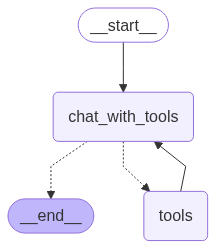

In [2]:
app

In [2]:
# Imports
from dotenv import load_dotenv
import streamlit as st
import arxiv
from typing import Annotated
from typing_extensions import TypedDict

from langchain.tools import tool
from langchain_community.tools import TavilySearchResults
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage,SystemMessage
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

# Load env vars
load_dotenv()


# @tool
# def Arivsearch(query: str, max_result: int = 5) -> str:
#     """Arxiv search agent to retrieve research papers related to the user's query."""
#     search = arxiv.Search(query=query, max_results=max_result, sort_by=arxiv.SortCriterion.Relevance)
#     results = []

#     for paper in search.results():
#         info = (
#             f"📄 **Title**: {paper.title}\n"
#             f"👨‍🔬 **Authors**: {', '.join([a.name for a in paper.authors])}\n"
#             f"📅 **Published**: {paper.published.date()}\n"
#             f"🔗 **PDF**: {paper.pdf_url}\n"
#             "----------------------------------------\n"
#         )
#         results.append(info)

#     return "\n".join(results) if results else "No papers found for your query."



@tool
def Arivsearch(query: str, max_result: int = 5) -> str:
    """Arxiv search agent to retrieve research papers related to the user's query."""
    client = arxiv.Client()
    search = arxiv.Search(query=query, max_results=max_result, sort_by=arxiv.SortCriterion.Relevance)
    
    results = []

    for paper in client.results(search):
        info = (
            f" **Title**: {paper.title}\n"
            f" **Authors**: {', '.join([a.name for a in paper.authors])}\n"
            f" **Published**: {paper.published.date()}\n"
            f" **PDF**: {paper.pdf_url}\n"
            "----------------------------------------\n"
        )
        results.append(info)

    return "\n".join(results) if results else "No papers found for your query."

# 🔮 LLM Initialization
llm = ChatGroq(model="llama-3.1-8b-instant")
tool_list = [Arivsearch]
LLM_with_tools = llm.bind_tools(tool_list)

system_messages=SystemMessage(content="provide recent research paper using arxvi agent connected with you with strutured output")

# 📦 LangGraph State
class State(TypedDict):
    messages: Annotated[list, add_messages]

def chatbot_with_tools(state: State):
    result = LLM_with_tools.invoke(state["messages"]+[system_messages])
    return {"messages": [result]}

# 🧠 Build LangGraph
builder = StateGraph(State)
builder.add_node("chatbot_with_tools", chatbot_with_tools)
builder.add_node("tools", ToolNode(tool_list))

builder.add_conditional_edges("chatbot_with_tools", tools_condition)
builder.add_edge(START, "chatbot_with_tools")
builder.add_edge("tools", END)

app = builder.compile()

result=app.invoke(
    {
        "messages":HumanMessage(content="large language model")
    }
)

print(result["messages"][-1].content)






 **Title**: Lost in Translation: Large Language Models in Non-English Content Analysis
 **Authors**: Gabriel Nicholas, Aliya Bhatia
 **Published**: 2023-06-12
 **PDF**: http://arxiv.org/pdf/2306.07377v1
----------------------------------------

 **Title**: A Survey of GPT-3 Family Large Language Models Including ChatGPT and GPT-4
 **Authors**: Katikapalli Subramanyam Kalyan
 **Published**: 2023-10-04
 **PDF**: http://arxiv.org/pdf/2310.12321v1
----------------------------------------

 **Title**: Cognitive bias in large language models: Cautious optimism meets anti-Panglossian meliorism
 **Authors**: David Thorstad
 **Published**: 2023-11-18
 **PDF**: http://arxiv.org/pdf/2311.10932v1
----------------------------------------

 **Title**: Generative Agent-Based Models for Complex Systems Research: a review
 **Authors**: Yikang Lu, Alberto Aleta, Chunpeng Du, Lei Shi, Yamir Moreno
 **Published**: 2024-08-17
 **PDF**: http://arxiv.org/pdf/2408.09175v1
-------------------------------------

In [1]:
# arxiv_graph.py

from langgraph.graph import StateGraph
from typing import TypedDict, List
import arxiv

# Define state
class State(TypedDict):
    query: str
    results: List[dict]

# Function to search arXiv
def search_node(state: State) -> State:
    query = state["query"]
    client = arxiv.Client()
    search = arxiv.Search(query=query, max_results=5)
    papers = []

    for result in client.results(search):
        papers.append({
            "title": result.title,
            "authors": [a.name for a in result.authors],
            "published": result.published.strftime("%Y-%m-%d"),
            "summary": result.summary,
            "url": result.entry_id,
        })

    return { "results": papers}

# Build LangGraph
def build_graph():
    graph = StateGraph(State)
    graph.add_node("search", search_node)
    graph.set_entry_point("search")
    graph.set_finish_point("search")
    return graph.compile()

# Export the graph app
graph_app = build_graph()


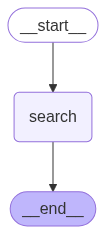

In [2]:
graph_app

In [24]:
query="large lanuage model"
output = graph_app.invoke({"query": query})

ConnectionError: HTTPSConnectionPool(host='export.arxiv.org', port=443): Max retries exceeded with url: /api/query?search_query=large+lanuage+model&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=100 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000028BEB553F20>: Failed to resolve 'export.arxiv.org' ([Errno 11001] getaddrinfo failed)"))

In [3]:
if __name__ == "__main__":
    query = "transformer neural network"
    output = graph_app.invoke({"query": query})
    print("Query:", output["query"])
    for i, paper in enumerate(output["results"]):
        print(f"\n{i+1}. {paper['title']}")
        print("Authors:", ", ".join(paper['authors']))
        print("Published:", paper['published'])
        print("Link:", paper['url'])
        print("Summary:", paper['summary'][:200], "...")


Query: transformer neural network

1. Neural Nets via Forward State Transformation and Backward Loss Transformation
Authors: Bart Jacobs, David Sprunger
Published: 2018-03-25
Link: http://arxiv.org/abs/1803.09356v1
Summary: This article studies (multilayer perceptron) neural networks with an emphasis
on the transformations involved --- both forward and backward --- in order to
develop a semantical/logical perspective tha ...

2. Neural Networks, Hypersurfaces, and Radon Transforms
Authors: Soheil Kolouri, Xuwang Yin, Gustavo K. Rohde
Published: 2019-07-04
Link: http://arxiv.org/abs/1907.02220v1
Summary: Connections between integration along hypersufaces, Radon transforms, and
neural networks are exploited to highlight an integral geometric mathematical
interpretation of neural networks. By analyzing  ...

3. Revisiting Transformation Invariant Geometric Deep Learning: Are Initial Representations All You Need?
Authors: Ziwei Zhang, Xin Wang, Zeyang Zhang, Peng Cui, Wenwu Zhu
Published: 

In [2]:
#human in the loop
"""
correct the and validation of llm output

1. Aprove or reject
2.llm-->human-->accept or reject

"""

#method 1

from  langchain_groq import ChatGroq
from dotenv import load_dotenv
from langgraph.graph import StateGraph, state ,END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import tools_condition
from langchain_core.messages import AIMessage,HumanMessage
from typing_extensions import Annotated
from typing import TypedDict

GENERATE_POST="generate_post"
GET_REVIEW_DECISION="get_review_decision"
POST="POST"
COLLECT_FEEDBACK="cllect_feedback"


class State(TypedDict):
    messages:Annotated[list,add_messages]


llm=ChatGroq(
    model="llama3-70b-8192"
)

def generte_post(state:State): #why state:State typeHint chech
    return{
        "message":[llm.invoke(state["messages"])] #state["messages"] extracting last human messages 	access the "messages" from the state dict
    }


def get_review_decision(state:State):
    post_content=state["messages"][-1].content
    print("/ curreent LinkedIN Post:\n") 
    print(post_content)
    print("\n")

    Decision=input("Post to LinkedIN? (yes/no)")

    if Decision.lower()=="yes":
        return POST
    else:
        return COLLECT_FEEDBACK
    

def post(state:State):
    final_post=state["messages"][-1].content
    print("Final Linked Post:\n")
    print(final_post)
    print("\n Post has beeb approved and is now on Linked!")


def collect_feedback(state:State):
    feedback=input("how can i improve this post?")
    return {
            "messages":[HumanMessage(content=feedback)]
    }


Bulider=StateGraph(State) #"I am building a LangGraph where every node will receive and return data matching the structure defined in State."


#create the nodes
Bulider.add_node(GENERATE_POST,generte_post)
Bulider.add_node(GET_REVIEW_DECISION,get_review_decision)
Bulider.add_node(COLLECT_FEEDBACK,collect_feedback)
Bulider.add_node(POST,post)

#connecting the node using edges

Bulider.set_entry_point(GENERATE_POST)
Bulider.add_conditional_edges(GENERATE_POST,get_review_decision)
Bulider.add_edge(POST,END)
Bulider.add_edge(COLLECT_FEEDBACK,GENERATE_POST)

In [5]:
app=Bulider.compile()

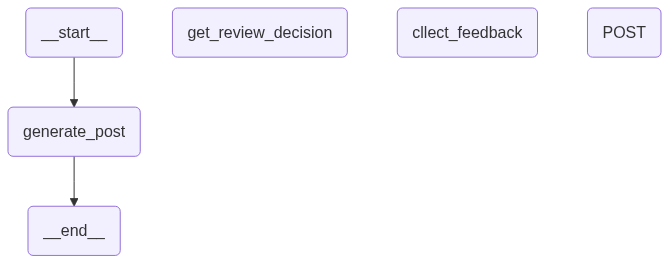

In [6]:
app

In [ ]:
app.invoke({
    'messages':HumanMessage("write the Linked in content generation")
})

/ curreent LinkedIN Post:

write the Linked in content generation


/ curreent LinkedIN Post:

yes




In [ ]:
from IPython import 

In [23]:
from langgraph.graph import StateGraph
from langgraph.types import interrupt, Command
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.graph import START,END
from typing import TypedDict
import uuid

class State(TypedDict):
    some_text:str

def human_node(state :State):
    value =interrupt(
        {
            "text_to_revise":state["some_text"]
        }
    )
    return {"some_text":value}

In [12]:
# 🛠️ Build the graph
graph_builder = StateGraph(State)
graph_builder.add_node("human_node", human_node)
graph_builder.add_edge(START, "human_node")

checkpointer = InMemorySaver()
graph = graph_builder.compile(checkpointer=checkpointer)

# 🎯 Give unique thread ID (required for HITL graphs)
thread_config = {"configurable": {"thread_id": uuid.uuid4()}}

In [13]:
result = graph.invoke({"some_text": "original text"}, config=thread_config)
print(result["__interrupt__"])

[Interrupt(value={'text_to_revise': 'original text'}, resumable=True, ns=['human_node:30f0f7c6-8402-5804-607b-71473117f99c'])]


In [9]:
response = graph.invoke(Command(resume="Edited by human"), config=thread_config)
print(response)

{'some_text': 'Edited by human'}


In [10]:
resume_map = {
    i.interrupt_id: f"human fix for: {i.value}"
    for i in graph.get_state(thread_config).interrupts
}

graph.invoke(Command(resume=resume_map), config=thread_config)


{'some_text': 'Edited by human'}

In [14]:
# First run — graph will pause and wait
result = graph.invoke({"some_text": "original text"}, config=thread_config)

# Show interrupt message
print("Human input needed...")
original = result["__interrupt__"][0].value["text_to_revise"]
print("Original text:", original)

# Get input from human (you, manually)
edited = input("Enter revised text: ")

# Resume the graph
result = graph.invoke(Command(resume=edited), config=thread_config)
print("Final Output:", result["some_text"])


Human input needed...
Original text: original text
Final Output: delet


In [15]:
class State(TypedDict):
    llm_output:str
    decision:str

In [16]:
def generate_llm_output(state:State) -> State:
    return {"llm_output":"this is the generated output"}

In [18]:
def human_approval(state:State):
    decision=interrupt({
        "question":"Do you approve the following output",
        "llm_output":state["llm_output"]
    })
    if decision=="approve":
        return Command(goto="approve_path",update={"decision":"approve"})
    else:
        return Command(goto="rejected_path",update={"decision":"rejected"})

In [19]:
def approved_node(state: State) -> State:
    print("✅ Approved path taken.")
    return state

def rejected_node(state: State) -> State:
    print("❌ Rejected path taken.")
    return state


In [21]:
approved_node("vigneshwsar")

✅ Approved path taken.


'vigneshwsar'

In [25]:
from langgraph.checkpoint.memory import InMemorySaver

In [27]:
builder = StateGraph(State)
builder.add_node("generate_llm_output", generate_llm_output)
builder.add_node("human_approval", human_approval)
builder.add_node("approved_path", approved_node)
builder.add_node("rejected_path", rejected_node)

builder.set_entry_point("generate_llm_output")
builder.add_edge("generate_llm_output", "human_approval")
builder.add_edge("approved_path", END)
builder.add_edge("rejected_path", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

In [29]:
config = {"configurable": {"thread_id": uuid.uuid4()}}
result = graph.invoke({}, config=config)

In [33]:
print(result["__interrupt__"])

[Interrupt(value={'question': 'Do you approve the following output', 'llm_output': 'this is the generated output'}, resumable=True, ns=['human_approval:d499ec0b-50fe-5a82-2d9a-04a8bdec4e00'])]


In [34]:
final_result = graph.invoke(Command(resume="approve"), config=config)


Task human_approval with path ('__pregel_pull', 'human_approval') wrote to unknown channel branch:to:approve_path, ignoring it.


In [35]:
print(final_result)

{}


In [36]:
from typing import Literal, TypedDict
import uuid

from langgraph.constants import START, END
from langgraph.graph import StateGraph
from langgraph.types import interrupt, Command
from langgraph.checkpoint.memory import MemorySaver

# Define the shared graph state
class State(TypedDict):
    llm_output: str
    decision: str

# Simulate an LLM output node
def generate_llm_output(state: State) -> State:
    return {"llm_output": "This is the generated output."}

# Human approval node
def human_approval(state: State) -> Command[Literal["approved_path", "rejected_path"]]:
    decision = interrupt({
        "question": "Do you approve the following output?",
        "llm_output": state["llm_output"]
    })

    if decision == "approve":
        return Command(goto="approved_path", update={"decision": "approved"})
    else:
        return Command(goto="rejected_path", update={"decision": "rejected"})

# Next steps after approval
def approved_node(state: State) -> State:
    print("✅ Approved path taken.")
    return state

# Alternative path after rejection
def rejected_node(state: State) -> State:
    print("❌ Rejected path taken.")
    return state

# Build the graph
builder = StateGraph(State)
builder.add_node("generate_llm_output", generate_llm_output)
builder.add_node("human_approval", human_approval)
builder.add_node("approved_path", approved_node)
builder.add_node("rejected_path", rejected_node)

builder.set_entry_point("generate_llm_output")
builder.add_edge("generate_llm_output", "human_approval")
builder.add_edge("approved_path", END)
builder.add_edge("rejected_path", END)

checkpointer = MemorySaver()
graph = builder.compile(checkpointer=checkpointer)

# Run until interrupt
config = {"configurable": {"thread_id": uuid.uuid4()}}
result = graph.invoke({}, config=config)
print(result["__interrupt__"])
# Output:
# Interrupt(value={'question': 'Do you approve the following output?', 'llm_output': 'This is the generated output.'}, ...)

# Simulate resuming with human input
# To test rejection, replace resume="approve" with resume="reject"
final_result = graph.invoke(Command(resume="approve"), config=config)
print(final_result)

[Interrupt(value={'question': 'Do you approve the following output?', 'llm_output': 'This is the generated output.'}, resumable=True, ns=['human_approval:f528f875-c2fe-c17f-c8d7-71d3bca40700'])]
✅ Approved path taken.
{'llm_output': 'This is the generated output.', 'decision': 'approved'}


In [ ]:
#complete templet human Aprove or Rejected

from typing import Literal, TypedDict ,List
import uuid

from langgraph.constants import START, END
from langgraph.graph import StateGraph
from langgraph.types import interrupt, Command
from langgraph.checkpoint.memory import MemorySaver
from typing import Annotated
from langgraph.graph.message import add_messages
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage ,AIMessage

#model initialization
llm=ChatGroq(
    model="llama-3.1-8b-instant", 
)

# Define the shared graph state
class State(TypedDict):
    messages : Annotated[List ,add_messages]


def generate_llm_output(state:State):
    return{
        "messages":[llm.invoke(state["messages"])]
    }


def human_approval(state:State):
    decision=interrupt({
        "question":"Do you approve the following output?",
         "messages":state["messages"]
    })

    if decision == "approve":
        return Command(goto="approved_path")
    else:
        return Command(goto="rejected_path")
    


def approved_node(state:State):
    print("approved path ouput")
    print(state["messages"])


def rejected_node(state:State):
    print("X reject the back to llm")

    prompt=f"""
      user want to modife the ouput {state["messages"]}

"""
    
    response=llm.invoke(prompt)
    return {
        "messages":AIMessage(content=response.content)
    }




builder = StateGraph(State)
builder.add_node("generate_llm_output", generate_llm_output)
builder.add_node("human_approval", human_approval)
builder.add_node("approved_path", approved_node)
builder.add_node("rejected_path", rejected_node)

builder.set_entry_point("generate_llm_output")
builder.add_edge("generate_llm_output", "human_approval")
builder.add_edge("approved_path", END)
builder.add_edge("rejected_path", END)

checkpointer = MemorySaver()
graph = builder.compile(checkpointer=checkpointer)

# Run until interrupt
config = {"configurable": {"thread_id": uuid.uuid4()}}
result = graph.invoke({"messages":HumanMessage(content="write the poem for love")}, config=config)
print(result["__interrupt__"])


find_output=graph.invoke(Command(resume="rejected"),config=config)

print(find_output[0])





[Interrupt(value={'question': 'Do you approve the following output?', 'messages': [HumanMessage(content='write the poem for love', additional_kwargs={}, response_metadata={}, id='79941e18-3a38-4442-9a19-754154f1dd90'), AIMessage(content="**Eternal Flame of Love**\n\nIn the depths of my soul, a flame burns bright,\nA love so strong, it guides me through the night.\nIt's a feeling that's hard to explain,\nA connection that transcends time and pain.\n\nIt's the whispered words in a lover's ear,\nThe gentle touch that calms all fear.\nIt's the laughter, the tears, the memories we share,\nThe moments that make our love beyond compare.\n\nWith every beat of my heart, I feel it grow,\nA love that's pure, a love that glows.\nIt's the sunshine on a cloudy day,\nThe warmth that chases all the blues away.\n\nIn your eyes, I see a love so true,\nA reflection of the love that shines through.\nIt's a love that heals, a love that mends,\nA love that never ends.\n\nThrough life's ups and downs, we'll 

In [28]:
for m in find_output["messages"]:
    m.pretty_print()

================================ Human Message =================================

write the poem for love
================================== Ai Message ==================================

**Eternal Flame of Love**

In the depths of my soul, a flame burns bright,
A love so strong, it guides me through the night.
It's a feeling that's hard to explain,
A connection that transcends time and pain.

It's the whispered words in a lover's ear,
The gentle touch that calms all fear.
It's the laughter, the tears, the memories we share,
The moments that make our love beyond compare.

With every beat of my heart, I feel it grow,
A love that's pure, a love that glows.
It's the sunshine on a cloudy day,
The warmth that chases all the blues away.

In your eyes, I see a love so true,
A reflection of the love that shines through.
It's a love that heals, a love that mends,
A love that never ends.

Through life's ups and downs, we'll stand as one,
Together forever, under the same sun.
Our love will be the

In [11]:
from IPython.display import Image

In [14]:
image=display(Image(graph.get_graph().draw_mermaid_png()))

TypeError: 'module' object is not callable

In [17]:
image = display(Image(graph.get_graph().draw_mermaid_png()))


TypeError: 'module' object is not callable